<h1>CS4618: Artificial Intelligence I</h1>
<h1>Classification</h1>
<h2>
    Derek Bridge<br>
    School of Computer Science and Information Technology<br>
    University College Cork
</h2>

<h1>Initialization</h1>
$\newcommand{\Set}[1]{\{#1\}}$ 
$\newcommand{\Tuple}[1]{\langle#1\rangle}$ 
$\newcommand{\v}[1]{\pmb{#1}}$ 
$\newcommand{\cv}[1]{\begin{bmatrix}#1\end{bmatrix}}$ 
$\newcommand{\rv}[1]{[#1]}$ 
$\DeclareMathOperator{\argmax}{arg\,max}$ 
$\DeclareMathOperator{\argmin}{arg\,min}$ 
$\DeclareMathOperator{\dist}{dist}$
$\DeclareMathOperator{\abs}{abs}$

In [24]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from ipywidgets import interactive

from seaborn import lmplot, stripplot

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

<h1>Classification</h1>
<ul>
    <li>We want to create programs that make <b>predictions</b>.</li>
    <li>We have been studying <b>regression</b>: <b>regressors</b> are programs that predict numeric target values.</li>
    <li>We turn now to <b>classification</b>: <b>classifiers</b> predict an object's <b>class</b> from a 
        finite set of classes.
    </li>
    <li>E.g. given a vector of feature values that describe an email, predict whether the email is spam or ham.</li>
</ul>

<h2>Notation</h2>
<ul>
    <li>Our notation will be the same that we used for regression: 
        $\v{x}$ for an object, $y$ for the <em>actual</em> class label,
        $\hat{y}$ for the <em>predicted</em> class label.
    </li>
    <li>We assume we have a finite set of <b>labels</b>, $\cal{C}$, one per class.
        <ul>
            <li>
                Given an object $\v{x}$, our task is to assign one of the labels $\hat{y} \in \cal{C}$ to the object.
            </li>
        </ul>
    <li>We will often use integers for the labels.
        <ul>
            <li>E.g. given an email, a spam filter predicts $\hat{y} \in \Set{0,1}$, where 0 means ham and
                1 means spam.
            </li>
            <li>
                But a classifier should not treat these as continuous, e.g. it should never output 0.5.
            </li>
            <li>
                Furthermore, where there are more than two labels, we should not assume a relationship
                between the labels.
                <ul>
                    <li>Suppose there are three classes $\Set{1,2,3}$.</li>
                    <li>Suppose we are classifying object $\v{x}$ and we happen to know that its <em>actual</em> 
                        class label is $y = 3$.
                    </li>
                    <li>One classifier predicts $\hat{y} = 1$.</li>
                    <li>Another classifier predicts $\hat{y} = 2$.</li>
                    <li>Which classifier has done better?</li>
                </ul>
             </li>
         </ul>
     </li>
</ul>

<h2>A variation of classification</h2>
<ul>
    <li>Given an object $\v{x}$, a classifier outputs a label, $\hat{y} \in \cal{C}$.</li>
    <li>Instead, a classifer could output a probability distribution over the labels $\cal{C}$.
        <ul>
            <li>
                E.g. given an email $\v{x}$, a spam filter might output $\Tuple{0.2, 0.8}$ meaning 
                $P(y = \mathit{ham}\,|\, \v{x}) = 0.2$ and $P(y = \mathit{spam}\,|\, \v{x}) = 0.8$.
            </li>
            <li>
                The probabilities must sum to 1.
            </li>
        </ul>
    </li>
    <li>
        We can convert such a classifier into a more traditional one by taking the probability distribution
        and selecting the class with the highest probability:
        $$\arg \max_{\hat{y} \in \cal{C}} P(\hat{y}\,|\, \v{x})$$
    </li>
</ul>

<h2>Types of Classification</h2>
<ul>
    <li>We distinguish two types of classification:
        <ul>
            <li>
                <b>Binary classification</b>, in which there are just two classes, i.e. $|\cal{C}| = 2$, 
                e.g. fail/pass, ham/spam, benign/malignant.
            </li>
            <li>
                <b>Multiclass classification</b>, where there are more than two classes, i.e. $|\cal{C}| > 2$, 
                e.g. 
                let's say that a post to a forum or discussion board 
                can be a question, an answer, a clarification or an irrelevance.
            </li>
        </ul>
    </li>
    <li>In fact, there are even more types of classification, but we will not be studying them further:
        <ul>
            <li>In <b>multilabel classification</b>, the classifier can assign $\v{x}$ to more than one class.
                <ul>
                    <li>I.e. it outputs a <em>set</em> of labels, $\hat{y} \subseteq \cal{C}$.
                    </li>
                    <li>E.g. consider a movie classifier where the classes are genres, 
                        e.g. $\cal{C} = \Set{\mathit{comedy},
                        \mathit{action}, \mathit{horror}, \mathit{musical}, \mathit{romance}}$. 
                    </li>
                    <li>
                        The classifier's output for <i>The Blues Brothers</i> should be $\Set{\mathit{comedy},
                        \mathit{action}, \mathit{musical}}$.
                    </li>
                </ul>
                Do <strong>not</strong> confuse this with <em>multiclass</em> classification.
            </li>
            <li>In <b>ordered classification</b>, there is an <em>ordering</em> defined on the classes.
                <ul>
                    <li>The ordering matters in measuring the performance of the classifier.</li>
                    <li>E.g. consider a classifier that predicts a student's degree class, i.e. 
                        $\cal{C} = \Set{\mathit{Ordinary}, \mathit{3rd}, \mathit{2ii}, \mathit{2i}, \mathit{1st}}$.
                    </li>
                    <li>Suppose for student $\v{x}$, the actual class $y = \mathit{1st}$.</li>
                    <li>One classifier predicts $\hat{y} = \mathit{2ii}$.</li>
                    <li>Another classifier predicts $\hat{y} = \mathit{2i}$.</li>
                    <li>Which classifier has done better?</li>
                </ul>
            </li>
        </ul>
    </li>
</ul>

<h2>We need to say more about binary classification</h2>
<ul>
    <li>In binary classification, there are two classes.</li>
    <li>It is common to refer to one class (the one labelled 0) as the <b>negative class</b>
        and the other (the one labelled 1) as the <b>positive class</b>.
    </li>
    <li>It doesn't really matter which is which.
        <ul>
            <li>But, usually, we treat the class we're trying to identify, or the class that requires special action, 
                as the positive class.
            </li>
            <li>E.g. in spam filtering, ham is the negative class; spam is the positive class.
            </li>
            <li>
                What about tumour classification?
            </li>
        </ul>
    </li>
    <li>(This terminology is extended to other things too, e.g. we can refer to <b>negative examples</b> and
        <b>positive examples</b>.)
    </li>
</ul>

<h1>Class exercises</h1>
<img style="float: right" src="images/snow.jpg" />
<ul>
    <li>Consider:
        <ul>
            <li>Predicting tomorrow's rainfall.</li>
            <li>Predicting whether we will have a white Christmas.</li>
            <li>Predicting the sentiment of a tweet (negative, neutral or positive).</li>
            <li>Predicting a person's sexual orientation.</li>
            <li>Predicting a person's opinion of a movie on a rating scale of 1 star (rotten) to 5 stars (fab).</li>
        </ul>
    </li>
    <li>Answer the following:
        <ul>
            <li>Which are regression and which classification?</li>
            <li>If classification, which are binary and which are multiclass?</li>
            <li>If binary, which is the positive class and which the negative?</li>
        </ul>
    </li>
</ul>

<h1>The CS1109 Dataset</h1>
<ul>
    <li>I collected a dataset of student performances in a now-defunct programming module (<i>CS1109</i>).</li>
    <li>Three features: lecture attendance (%), lab attendance (%) and CAO points.</li>
    <li>Two classes: $0 = \mathit{pass}, 1 = \mathit{fail}$.
    <li>Let's explore it a bit.</li>
    <li>(We should really split off a test set. But, for the purposes of this introductory material, we
        won't bother.)
    </li>
</ul>

In [26]:
# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv("../datasets/dataset_cs1109.csv")

In [27]:
# The dimensions
df.shape

(342, 4)

In [28]:
# The columns
df.columns

Index(['lect', 'lab', 'cao', 'outcome'], dtype='object')

In [29]:
# The datatypes
df.dtypes

lect        int64
lab         int64
cao         int64
outcome    object
dtype: object

In [30]:
# A few rows
df.head()

,lect,lab,cao,outcome
0,92,95,490,pass
1,63,73,465,pass
2,78,86,530,pass
3,98,95,380,pass
4,88,100,470,pass


In [31]:
# There are no NaNs
for column in df.columns:
    print(column, df[column].isnull().values.any())

lect False
lab False
cao False
outcome False


In [32]:
# Summary statistics
df.describe(include="all")

,lect,lab,cao,outcome
count,342.000000,342.000000,342.000000,342
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,pass
freq,NaN,NaN,NaN,206
mean,78.970760,79.722222,395.877193,NaN
std,22.590431,22.931276,60.705453,NaN
min,0.000000,0.000000,215.000000,NaN
25%,70.000000,73.000000,350.000000,NaN
50%,86.000000,86.000000,390.000000,NaN
75%,95.000000,95.000000,430.000000,NaN


<ul>
    <li>For regression, we used a lot of scatter plots: one feature on the $x$-axis and either
        the target value or another feature on the $y$-axis.
    </li>
    <li>For classification, we can show <em>two</em> features, one on each axis, with class labels
        shown using points of different shapes and colours.
    </li>
</ul>

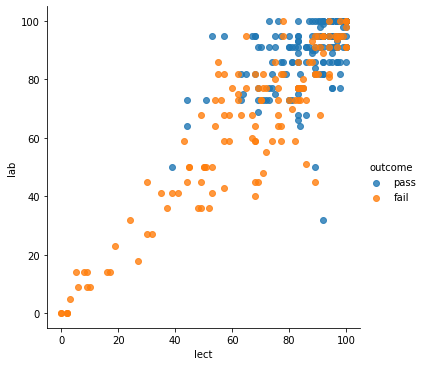

In [33]:
plot = lmplot(x="lect", y="lab", hue="outcome", data=df, fit_reg=False) 

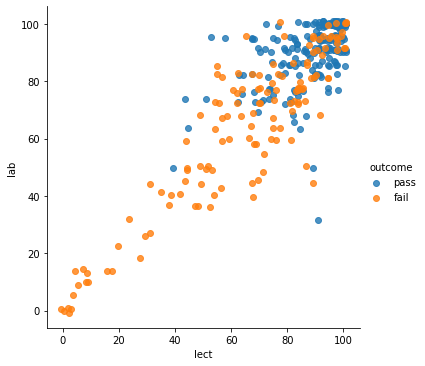

In [34]:
# We can reduce points sitting on top of each other by adding some jitter
plot = lmplot(x="lect", y="lab", hue="outcome", data=df, fit_reg=False, 
       x_jitter=.01*(max(df["lect"])-min(df["lect"])), 
       y_jitter=.01*(max(df["lab"])-min(df["lab"]))
) 

<ul>
    <li>If this were a module about Data Visualization, we might look at some other kinds of plots too,
        e,g, histograms and box plots.
    </li>
    <li>In their place, here's one more scatter plot. It shows one feature (this time on the $y$-axis)
        and the class labels (on the $x$-axis) and also uses some jitter.
    </li>
</ul>

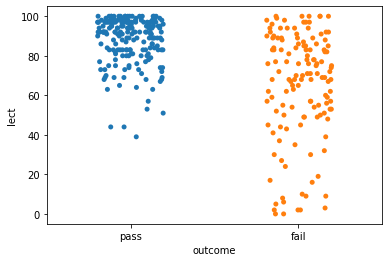

In [35]:
plot = stripplot(x="outcome", y="lect", data=df, jitter=0.2)

<ul>
    <li>We need the class labels to be integers. The <code>LabelEncoder</code> class will do this.
        However, it does not let us choose which will be the positive class. In fact, in this case,
        "pass" ends up being positive (1) and fail is negative (0). But it doesn't matter!
    </li>
</ul>

In [36]:
# The features
features = ["lect", "lab", "cao"]

# Extract the features
X = df[features]

# Target values, encoded and converted to a 1D numpy array
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["outcome"])

In [37]:
# Create the preprocessor
preprocessor = ColumnTransformer([
        ("scaler", StandardScaler(), features)], 
        remainder="passthrough")

<h2>kNN classifier</h2>
<ul>
    <li>We can use <b>instance-based learning</b> for classification.</li>
    <li>As before, we find the $k$ nearest-neighbours. For regression, we took the mean of the neighbours'
        $y$-values. For classification, we take a vote: the class with the majority vote wins.
        <ul>
            <li>E.g. to classify Craig, we find 3 similar students. If two more of them passed, we predict
                Craig will pass. Otherwise, we predict Craig will fail.
            </li>
            <li>Why for kNN classification, do we often chose $k$ to be an odd number?</li>
            <li>There are lots of variants of this, e.g. we can have weighted majority vote, where the
                closer a neighbour is, the greater the weight of its vote.
            </li>
        </ul>
    </li>
</ul>

In [38]:
knn = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", KNeighborsClassifier(n_neighbors=3))])

knn.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['lect', 'lab', 'cao'])])),
                ('predictor', KNeighborsClassifier(n_neighbors=3))])

<ul>
    <li>Let's predict outcomes for Craig (lecture attendance 60%, lab attendance 25% and 500 CAO points) and Chiyo
        (80%, 90%, 350).
    </li>
</ul>

In [39]:
students = pd.DataFrame([{"lect": 60, "lab": 25, "cao": 500}, 
                         {"lect": 80, "lab": 90, "cao": 350}])

In [40]:
knn.predict(students)

array([0, 0])

<ul>
    <li>Hard to remember what this mean, so use the <code>LabelEncoder</code>:</li>
</ul>

In [41]:
label_encoder.inverse_transform(knn.predict(students))

array(['fail', 'fail'], dtype=object)

<h2>Logistic Regression</h2>
<ul>
    <li>We can also use <b>model-based learning</b> for classification.</li>
    <li>There all sorts of model, but the simplest again is a <b>linear model</b>.
        <ul>
            <li>For regression, we wanted to find the line/plane/hyperplane that best fits the 
                training examples.
            </li>
            <li>For classification, we want to find the line/plane/hyperplane that best separates
                training examples of different classes.
            </li>
        </ul>
    </li>
    <li>Let's visualize, which means we can only use two of the features.</li>
</ul>

In [42]:
# Get the feature-values (just lect and lab) and the target values 
lects = df["lect"]
labs = df["lab"]
outcomes = df["outcome"]

def boundary_plot(beta0, beta1):
    fig = plt.figure(figsize=(6,6))
    plt.title("Training set, and the decision boundary")
    plt.scatter(lects[outcomes=="fail"], labs[outcomes=="fail"], color = "green", marker="s")
    plt.scatter(lects[outcomes=="pass"], labs[outcomes=="pass"], color = "red", marker="o")
    xvals = np.linspace(0, 100, 2)
    plt.plot(xvals, beta0+xvals*beta1, color="blue")
    plt.xlabel("Lecture attendance (%)")
    plt.xlim(0, 100)
    plt.ylabel("Lab attendance (%)")
    plt.ylim(0, 100)
    plt.show()
    
interactive_plot = interactive(boundary_plot, beta0=(50,150), beta1=(-10,10,.1))
interactive_plot

interactive(children=(IntSlider(value=100, description='beta0', max=150, min=50), FloatSlider(value=0.0, descr…

<ul>
    <li>If it is possible to find a line that separates the data (only positive examples on one side, only negative
        examples on the other), we say the dataset is <b>linearly separable</b>.
        <ul>
            <li>Is the CS1109 dataset linearly separable?</li>
        </ul>
    </li>
    <li>This generalizes from straight lines to planes and hyperplanes in the case of more features.</li>
</ul>

<ul>
    <li>In scikit-learn, the class for doing this is called <code>LogisticRegression</code>.
        <ul>
            <li>Despite its name, it does classification, not regression.</li>
            <li>As we will learn in the next lecture, it uses Gradient Descent, so it
                works better if the data is scaled.</li>
        </ul>
    </li>
</ul>

In [43]:
logistic_model = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", LogisticRegression())])

logistic_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['lect', 'lab', 'cao'])])),
                ('predictor', LogisticRegression())])

In [44]:
label_encoder.inverse_transform(logistic_model.predict(students))

array(['fail', 'pass'], dtype=object)

<ul>
    <li><strong>Don't copy any code from this notebook!</strong></li>
    <li>The code introduces the ideas but it does not split the dataset, etc.</li>
</ul>